In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

from lightgbm import LGBMRegressor
import random
import xgboost as xgb

In [3]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\uv_new'

In [4]:
forders_tr = os.listdir(curr_dir+"\\data\\"+"\\fin_train_val")
forders_tr

['uv_train.csv']

In [5]:
df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\fin_train_val\\")+forders_tr[0])

In [6]:
# df[df['yyyymmdd'] == 20210801].index[0]  # 1209883
# df.iloc[df[df['yyyymmdd'] == 20210801].index[0]:]
# df.iloc[:df[df['yyyymmdd'] == 20210801].index[0]]


tr1 = df.iloc[df[df['yyyymmdd'] == 20200501].index[0]:df[df['yyyymmdd'] == 20201101].index[0]]
tr2 = df.iloc[df[df['yyyymmdd'] == 20210501].index[0]:df[df['yyyymmdd'] == 20210801].index[0]]

train = pd.concat([tr1,tr2],axis=0)
train

val = df.iloc[df[df['yyyymmdd'] == 20210801].index[0]:df[df['yyyymmdd'] == 20211101].index[0]]
val

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
1209883,20210801,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,0.00089,-0.00015,...,264.44311,290.55389,288.92546,284.67080,270.70772,127.16116,38.96359,-5.60122,71.00,0
1209884,20210801,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,0.00000,-0.00015,...,259.14507,283.10942,282.76528,280.43877,268.61000,123.36327,43.95463,-5.09260,26.04,3
1209885,20210801,0,108,126.96500,37.57100,0.0,0.00000,0.00057,-0.00119,0.00120,...,252.93837,273.65182,270.18990,267.15459,258.99048,123.18739,43.77999,-5.07447,85.50,3
1209886,20210801,0,112,126.62490,37.47772,0.0,0.00000,0.00000,-0.00030,-0.00060,...,250.27920,268.14394,268.04466,266.56403,259.34748,123.22507,43.67046,-5.08058,68.99,3
1209887,20210801,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00000,-0.00015,...,263.38986,289.67998,288.05013,284.04277,269.26719,123.91259,43.74521,-5.16058,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403209,20211031,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00015,...,243.98668,261.95199,261.21896,259.29863,250.50021,157.14313,41.81018,-8.56636,62.90,3
1403210,20211031,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,-0.00089,0.00120,...,255.89419,281.48837,281.57322,280.00595,265.73255,157.99342,41.52495,-8.67521,82.00,2
1403211,20211031,2350,156,126.89158,35.17294,0.0,0.00057,0.00000,0.00000,0.00015,...,246.57815,265.43902,264.76641,262.60697,252.65714,157.69250,41.04849,-8.59148,72.38,3
1403212,20211031,2350,159,129.03203,35.10468,0.0,0.00057,0.00000,-0.00179,-0.00060,...,257.75436,284.11394,283.85736,280.96228,265.34129,158.37811,40.96396,-8.68840,69.56,3


In [4]:
# summer_tr = forders_tr[4:10] + forders_tr[12+4:12+10-3]
# summer_tr

# summer_val = forders_tr[12+10-3:12+10]
# summer_val

['2108_uv_nooutlier.csv', '2109_uv_nooutlier.csv', '2110_uv_nooutlier.csv']

In [5]:
# train = pd.DataFrame()

# for files in summer_tr:
#     df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\uv_train_val\\")+files)
#     train = pd.concat([train, df])
    
# train.drop('idx', axis=1, inplace=True)
# train

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200501,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,-0.00030,0.00165,...,252.91737,277.63245,277.03649,275.67037,262.71147,130.35092,38.96359,-6.11462,71.00,0
1,20200501,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,-0.00060,-0.00090,...,256.69212,286.82011,287.23821,285.51819,269.40510,126.43187,43.95463,-5.60867,26.04,3
2,20200501,0,108,126.96500,37.57100,0.0,0.00000,0.00000,0.00000,0.00090,...,253.85590,281.28558,281.42512,280.03692,266.81080,126.31564,43.77999,-5.59822,85.50,3
3,20200501,0,112,126.62490,37.47772,0.0,0.00000,0.00000,0.00089,0.00030,...,254.78101,283.03827,283.39275,282.06360,268.05385,126.36437,43.67046,-5.60546,68.99,3
4,20200501,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00030,0.00075,...,251.68704,277.82840,278.25056,275.71853,262.56565,126.91833,43.74521,-5.66707,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65607,20210731,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00060,...,264.53165,291.90287,290.09587,285.48855,270.82702,124.36364,41.81018,-4.72602,62.90,3
65608,20210731,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,0.00000,-0.00030,...,262.88449,288.27382,286.67481,282.45891,269.23268,125.09137,41.52495,-4.87156,82.00,2
65609,20210731,2350,156,126.89158,35.17294,0.0,-0.00057,0.00000,0.00000,0.00015,...,262.57588,287.50208,284.96722,280.05240,267.56515,124.95628,41.04849,-4.79509,72.38,3
65610,20210731,2350,159,129.03203,35.10468,0.0,0.00000,0.00000,-0.00119,0.00000,...,262.22936,287.43410,286.66069,283.63739,270.60537,125.49764,40.96396,-4.91507,69.56,3


In [23]:
ratio=[]
num = []
for i in range(len(train.columns)):
    ratio.append(len(train[train[train.columns[i]] == -999.0])/len(train))
    num.append(len(train[train[train.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [25]:
# val = pd.DataFrame()

# for files in summer_val:
#     df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+files)
#     val = pd.concat([val, df])
    
# val.drop('idx', axis=1, inplace=True)
# val

In [26]:
ratio=[]
num = []
for i in range(len(val.columns)):
    ratio.append(len(val[val[val.columns[i]] == -999.0])/len(val))
    num.append(len(val[val[val.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [7]:
forders_te = os.listdir(curr_dir+"\\data\\"+"\\fin_test")
forders_te

['uv_test.csv']

In [8]:
# forders_te = os.listdir(curr_dir+"\\data\\"+"\\test")
# forders_te

df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\fin_test\\")+forders_te[0])
# d = list(df.columns)
# for j in range(1,len(d)):
#     d[j] = d[j].replace("202206_uv.", "")
# df.columns = d
# df.drop('Unnamed: 0', axis=1, inplace=True)
test = df
test.describe()
test

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,NaN,0.00000,0.00000,-0.00060,0.00060,...,241.07130,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0
1,20220601,0,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.00000,-0.00030,...,244.35010,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3
2,20220601,0,108,126.96500,37.57100,NaN,0.00000,-0.00057,-0.00030,0.00045,...,249.24111,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3
3,20220601,0,112,126.62490,37.47772,NaN,0.00000,0.00000,0.00060,0.00045,...,249.94977,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3
4,20220601,0,115,130.89864,37.48129,NaN,0.00000,0.00000,0.00089,-0.00030,...,239.88321,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,NaN,0.00000,-0.00057,-0.00089,0.00015,...,258.49191,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3
51851,20220625,0,152,129.33472,35.58250,NaN,-0.00057,0.00000,-0.00030,-0.00030,...,263.99872,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2
51852,20220625,0,156,126.89158,35.17294,NaN,0.00000,0.00000,0.00089,-0.00030,...,261.53112,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3
51853,20220625,0,159,129.03203,35.10468,NaN,0.00000,0.00057,0.00030,-0.00075,...,260.95627,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3


In [9]:
low = test.columns.str.lower() 
low
test.columns = low
test

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,NaN,0.00000,0.00000,-0.00060,0.00060,...,241.07130,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0
1,20220601,0,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.00000,-0.00030,...,244.35010,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3
2,20220601,0,108,126.96500,37.57100,NaN,0.00000,-0.00057,-0.00030,0.00045,...,249.24111,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3
3,20220601,0,112,126.62490,37.47772,NaN,0.00000,0.00000,0.00060,0.00045,...,249.94977,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3
4,20220601,0,115,130.89864,37.48129,NaN,0.00000,0.00000,0.00089,-0.00030,...,239.88321,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,NaN,0.00000,-0.00057,-0.00089,0.00015,...,258.49191,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3
51851,20220625,0,152,129.33472,35.58250,NaN,-0.00057,0.00000,-0.00030,-0.00030,...,263.99872,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2
51852,20220625,0,156,126.89158,35.17294,NaN,0.00000,0.00000,0.00089,-0.00030,...,261.53112,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3
51853,20220625,0,159,129.03203,35.10468,NaN,0.00000,0.00057,0.00030,-0.00075,...,260.95627,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3


In [36]:
ratio=[]
num = []
for i in range(len(test.columns)):
    ratio.append(len(test[test[test.columns[i]] == -999.0])/len(test))
    num.append(len(test[test[test.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# Model

In [10]:
pip install optuna

     ------------------------------------- 308.2/308.2 kB 19.9 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 50.0 MB/s eta 0:00:00
     ---------------------------------------- 81.0/81.0 kB ? eta 0:00:00
     -------------------------------------- 155.4/155.4 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 209.8/209.8 kB ? eta 0:00:00
     ---------------------------------------- 101.6/101.6 kB ? eta 0:00:00
     ---------------------------------------- 78.6/78.6 kB ? eta 0:00:00
     -------------------------------------- 112.3/112.3 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 147.1/147.1 kB ? eta 0:00:00
     ---------------------------------------- 49.5/49.5 kB ? eta 0:00:00
     ---------------------------------------- 95.2/95.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyperclip: filename=pyperclip-1.8.2

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [40]:
import optuna
from optuna import Trial, visualization
import lightgbm as lgb

In [ ]:
# def Objective(trial):
#     mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
#     estimator = trial.suggest_int("estimators", 100, 5000, step=100)
#     max_depth = trial.suggest_int("max_depth", 3, 11, step=1)
#     scale_pos_weight = trial.suggest_int("scale_pos_weight", 1.1, 1.5, step=0.1)
#     colsample_bytree = trial.suggest_float("colsample_bytree", 1, 3)
#     lambda_sparse = trial.suggest_float("lambda_sparse", 1e-6, 1e-3, log=True)
#     tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
#                      lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
#                      optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
#                      mask_type=mask_type, n_shared=n_shared,
#                      scheduler_params=dict(mode="min",
#                                            patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
#                                            min_lr=1e-5,
#                                            factor=0.5,),
#                      scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
#                      verbose=True,
#                      )
#     regressor = TabNetRegressor(**tabnet_params)
#     regressor.fit(X_train=X_train, y_train=y_train,
#               eval_set=[(X_val, y_val)],
#               patience=trial.suggest_int("patience",low=15,high=30), max_epochs=trial.suggest_int('epochs', 1, 100),
#               eval_metric=['rmse'])

In [31]:
# def objective(trial, X_train, y_train, X_val, y_val):
#     param_grid = {
#         #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
#         "boosting": trial.suggest_categorical("boosting", ['gbdt','rf','dart','goss']),
#         "n_estimators": trial.suggest_int("n_estimators", 100, 10000, step=100),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
#         "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
#         "max_depth": trial.suggest_int("max_depth", 3, 12),
#         "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
#         "max_bin": trial.suggest_int("max_bin", 200, 300),
#         "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
#         "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
#         "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
#         "bagging_fraction": trial.suggest_float(
#             "bagging_fraction", 0.2, 0.95, step=0.1
#         ),
#         "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
#         "feature_fraction": trial.suggest_float(
#             "feature_fraction", 0.2, 0.95, step=0.1
#         ),
#     }
    
#     lgbm_reg = LGBMRegressor()
    
#     lgbm_reg.fit(X_train, y_train,
#               eval_set=[(X_val, y_val)],
#               eval_metric=["rmse"],
#               early_stopping_rounds=200,
#               verbose=True) 

In [32]:
# X_train = train.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'], axis=1)
# X_val = val.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)
# X_test = test.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)

# y_train = train[['uv']].values
# y_val = val[['uv']].values


# study = optuna.create_study(direction="minimize", study_name='lgbm optimization')
# func = lambda trial: objective(trial, X_train, y_train, X_val, y_val)
# # study.optimize(objective, timeout=6*60) #5 hours
# study.optimize(func, n_trials=20) #5 hours

[I 2022-07-29 14:00:23,980] A new study created in memory with name: lgbm optimization
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:24,564] Trial 0 failed, because the value None could not be cast to float.


[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.27253
[74]	valid_0's rmse: 0.521548	valid_0's l2: 0.272012
[75]	valid_0's rmse: 0.521454	valid_0's l2: 0.271914
[76]	valid_0's rmse: 0.520991	valid_0's l2: 0.271432
[77]	valid_0's rmse: 0.520646	valid_0's l2: 0.271072
[78]	valid_0's rmse: 0.520564	valid_0's l2: 0.270987
[79]	valid_0's rmse: 0.520343	valid_0's l2: 0.270757
[80]	valid_0's rmse: 0.520441	valid_0's l2: 0.270858
[81]	valid_0's rmse: 0.52011	valid_0's l2: 0.27051

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:25,206] Trial 1 failed, because the value None could not be cast to float.


[48]	valid_0's rmse: 0.5333	valid_0's l2: 0.284409
[49]	valid_0's rmse: 0.532184	valid_0's l2: 0.28322
[50]	valid_0's rmse: 0.531273	valid_0's l2: 0.282251
[51]	valid_0's rmse: 0.530565	valid_0's l2: 0.2815
[52]	valid_0's rmse: 0.530329	valid_0's l2: 0.281249
[53]	valid_0's rmse: 0.529937	valid_0's l2: 0.280833
[54]	valid_0's rmse: 0.529005	valid_0's l2: 0.279846
[55]	valid_0's rmse: 0.528384	valid_0's l2: 0.279189
[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[6

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:25,816] Trial 2 failed, because the value None could not be cast to float.


[54]	valid_0's rmse: 0.529005	valid_0's l2: 0.279846
[55]	valid_0's rmse: 0.528384	valid_0's l2: 0.279189
[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.2726

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:26,426] Trial 3 failed, because the value None could not be cast to float.


[54]	valid_0's rmse: 0.529005	valid_0's l2: 0.279846
[55]	valid_0's rmse: 0.528384	valid_0's l2: 0.279189
[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.2726

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:27,021] Trial 4 failed, because the value None could not be cast to float.


[55]	valid_0's rmse: 0.528384	valid_0's l2: 0.279189
[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.2725

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:27,630] Trial 5 failed, because the value None could not be cast to float.


[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.27253
[74]	valid_0's rmse: 0.521548	valid_0's l2: 0.272012
[75]	valid_0's rmse: 0.521454	valid_0's l2: 0.27191

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:28,226] Trial 6 failed, because the value None could not be cast to float.


[55]	valid_0's rmse: 0.528384	valid_0's l2: 0.279189
[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.2725

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:28,822] Trial 7 failed, because the value None could not be cast to float.


[55]	valid_0's rmse: 0.528384	valid_0's l2: 0.279189
[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.2725

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:29,468] Trial 8 failed, because the value None could not be cast to float.


[98]	valid_0's rmse: 0.517386	valid_0's l2: 0.267688
[99]	valid_0's rmse: 0.517153	valid_0's l2: 0.267447
[100]	valid_0's rmse: 0.517146	valid_0's l2: 0.26744


C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:30,054] Trial 9 failed, because the value None could not be cast to float.


[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.27253
[74]	valid_0's rmse: 0.521548	valid_0's l2: 0.272012
[75]	valid_0's rmse: 0.521454	valid_0's l2: 0.27191

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:30,645] Trial 10 failed, because the value None could not be cast to float.


[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.27253
[74]	valid_0's rmse: 0.521548	valid_0's l2: 0.272012
[75]	valid_0's rmse: 0.521454	valid_0's l2: 0.27191

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:31,250] Trial 11 failed, because the value None could not be cast to float.


[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.27253
[74]	valid_0's rmse: 0.521548	valid_0's l2: 0.272012
[75]	valid_0's rmse: 0.521454	valid_0's l2: 0.271914
[76]	valid_0's rmse: 0.520991	valid_0's l2: 0.271432
[77]	valid_0's rmse: 0.520646	valid_0's l2: 0.27107

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:31,860] Trial 12 failed, because the value None could not be cast to float.


[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.27253
[74]	valid_0's rmse: 0.521548	valid_0's l2: 0.27201

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:32,451] Trial 13 failed, because the value None could not be cast to float.


[55]	valid_0's rmse: 0.528384	valid_0's l2: 0.279189
[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.2725

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:33,041] Trial 14 failed, because the value None could not be cast to float.


[54]	valid_0's rmse: 0.529005	valid_0's l2: 0.279846
[55]	valid_0's rmse: 0.528384	valid_0's l2: 0.279189
[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.2726

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:33,650] Trial 15 failed, because the value None could not be cast to float.


[55]	valid_0's rmse: 0.528384	valid_0's l2: 0.279189
[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.2725

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:34,213] Trial 16 failed, because the value None could not be cast to float.


[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.27253
[74]	valid_0's rmse: 0.521548	valid_0's l2: 0.272012
[75]	valid_0's rmse: 0.521454	valid_0's l2: 0.271914
[76]	valid_0's rmse: 0.520991	valid_0's l2: 0.27143

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:34,806] Trial 17 failed, because the value None could not be cast to float.


[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.27253
[74]	valid_0's rmse: 0.521548	valid_0's l2: 0.27201

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:35,406] Trial 18 failed, because the value None could not be cast to float.


[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.272637
[72]	valid_0's rmse: 0.522164	valid_0's l2: 0.272655
[73]	valid_0's rmse: 0.522044	valid_0's l2: 0.27253
[74]	valid_0's rmse: 0.521548	valid_0's l2: 0.27201

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.2, 0.95] and q=0.1, but the range is not divisible by `q`. It will be replaced by [0.2, 0.9].
  warnings.warn(
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

[1]	valid_0's rmse: 1.89322	valid_0's l2: 3.5843
[2]	valid_0's rmse: 1.73681	valid_0's l2: 3.0165
[3]	valid_0's rmse: 1.59745	valid_0's l2: 2.55183
[4]	valid_0's rmse: 1.47247	valid_0's l2: 2.16816
[5]	valid_0's rmse: 1.36108	valid_0's l2: 1.85255
[6]	valid_0's rmse: 1.26417	valid_0's l2: 1.59812
[7]	valid_0's rmse: 1.17548	valid_0's l2: 1.38175
[8]	valid_0's rmse: 1.09879	valid_0's l2: 1.20733
[9]	valid_0's rmse: 1.03097	valid_0's l2: 1.0629
[10]	valid_0's rmse: 0.971239	valid_0's l2: 0.943306
[11]	valid_0's rmse: 0.91893	valid_0's l2: 0.844433
[12]	valid_0's rmse: 0.872631	valid_0's l2: 0.761485
[13]	valid_0's rmse: 0.83181	valid_0's l2: 0.691908
[14]	valid_0's rmse: 0.795773	valid_0's l2: 0.633255
[15]	valid_0's rmse: 0.764589	valid_0's l2: 0.584597
[16]	valid_0's rmse: 0.738694	valid_0's l2: 0.545669
[17]	valid_0's rmse: 0.713834	valid_0's l2: 0.509559
[18]	valid_0's rmse: 0.692924	valid_0's l2: 0.480144
[19]	valid_0's rmse: 0.674162	valid_0's l2: 0.454495
[20]	valid_0's rmse: 0.65

[W 2022-07-29 14:00:36,032] Trial 19 failed, because the value None could not be cast to float.


[53]	valid_0's rmse: 0.529937	valid_0's l2: 0.280833
[54]	valid_0's rmse: 0.529005	valid_0's l2: 0.279846
[55]	valid_0's rmse: 0.528384	valid_0's l2: 0.279189
[56]	valid_0's rmse: 0.528013	valid_0's l2: 0.278798
[57]	valid_0's rmse: 0.527072	valid_0's l2: 0.277805
[58]	valid_0's rmse: 0.526828	valid_0's l2: 0.277548
[59]	valid_0's rmse: 0.526229	valid_0's l2: 0.276917
[60]	valid_0's rmse: 0.525681	valid_0's l2: 0.27634
[61]	valid_0's rmse: 0.525313	valid_0's l2: 0.275954
[62]	valid_0's rmse: 0.525204	valid_0's l2: 0.275839
[63]	valid_0's rmse: 0.524855	valid_0's l2: 0.275473
[64]	valid_0's rmse: 0.524375	valid_0's l2: 0.27497
[65]	valid_0's rmse: 0.524071	valid_0's l2: 0.27465
[66]	valid_0's rmse: 0.52381	valid_0's l2: 0.274377
[67]	valid_0's rmse: 0.523571	valid_0's l2: 0.274126
[68]	valid_0's rmse: 0.523483	valid_0's l2: 0.274034
[69]	valid_0's rmse: 0.523009	valid_0's l2: 0.273538
[70]	valid_0's rmse: 0.522663	valid_0's l2: 0.273176
[71]	valid_0's rmse: 0.522147	valid_0's l2: 0.2726

In [43]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

In [44]:
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dtest = lgb.Dataset(X_val, label=y_val)

    param = {
        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(y_val, lgb_model.predict(X_val))
    return rmse
        
study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb.optimize(objective, n_trials=100)

[I 2022-07-29 14:08:42,540] A new study created in memory with name: no-name-922c8772-530e-436b-bd37-2023f92133a1
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector 

[I 2022-07-29 14:09:31,518] Trial 6 finished with value: 2.0049184483043416 and parameters: {'max_depth': 13, 'learning_rate': 1.3485992516968212e-05, 'n_estimators': 2735, 'min_child_samples': 35, 'subsample': 0.4345676420333751}. Best is trial 2 with value: 1.3058802761463646.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed

[I 2022-07-29 14:10:00,841] Trial 13 finished with value: 1.4953501277705035 and parameters: {'max_depth': 3, 'learning_rate': 0.0007774822178201122, 'n_estimators': 544, 'min_child_samples': 49, 'subsample': 0.9537507201053228}. Best is trial 11 with value: 0.8928125432935031.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed 

[I 2022-07-29 14:10:38,869] Trial 20 finished with value: 2.050585722117216 and parameters: {'max_depth': 8, 'learning_rate': 6.125424702987992e-06, 'n_estimators': 1686, 'min_child_samples': 22, 'subsample': 0.5534573772272843}. Best is trial 18 with value: 0.5636386807727785.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed 

[I 2022-07-29 14:11:13,764] Trial 27 finished with value: 0.5805791277441 and parameters: {'max_depth': 9, 'learning_rate': 0.0027594391216248524, 'n_estimators': 1064, 'min_child_samples': 26, 'subsample': 0.5618086936668583}. Best is trial 18 with value: 0.5636386807727785.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in

[I 2022-07-29 14:11:52,719] Trial 34 finished with value: 0.530000562569584 and parameters: {'max_depth': 11, 'learning_rate': 0.003763296834819172, 'n_estimators': 1417, 'min_child_samples': 5, 'subsample': 0.4111484383347534}. Best is trial 34 with value: 0.530000562569584.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in

[I 2022-07-29 14:13:01,775] Trial 41 finished with value: 0.5156340643805087 and parameters: {'max_depth': 11, 'learning_rate': 0.004290104676446703, 'n_estimators': 2480, 'min_child_samples': 32, 'subsample': 0.922610303274256}. Best is trial 40 with value: 0.5146535610570447.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed 

[I 2022-07-29 14:14:13,820] Trial 48 finished with value: 0.508998655473136 and parameters: {'max_depth': 15, 'learning_rate': 0.009949781944814166, 'n_estimators': 2997, 'min_child_samples': 43, 'subsample': 0.8739189172254802}. Best is trial 47 with value: 0.5069269897341129.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed 

[I 2022-07-29 14:15:30,769] Trial 55 finished with value: 2.068108615624801 and parameters: {'max_depth': 14, 'learning_rate': 1.184752960555678e-07, 'n_estimators': 2826, 'min_child_samples': 65, 'subsample': 0.8102918023999077}. Best is trial 54 with value: 0.5067812238661042.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed

[I 2022-07-29 14:16:53,293] Trial 62 finished with value: 2.068572557569692 and parameters: {'max_depth': 15, 'learning_rate': 2.4646939456263826e-08, 'n_estimators': 2911, 'min_child_samples': 71, 'subsample': 0.8569615814026273}. Best is trial 54 with value: 0.5067812238661042.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remove

[I 2022-07-29 14:18:12,905] Trial 69 finished with value: 0.5379289370344631 and parameters: {'max_depth': 15, 'learning_rate': 0.001682990132244403, 'n_estimators': 2678, 'min_child_samples': 72, 'subsample': 0.8201475258969426}. Best is trial 64 with value: 0.5067473361425381.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed

[I 2022-07-29 14:19:30,471] Trial 76 finished with value: 0.5178167284111038 and parameters: {'max_depth': 14, 'learning_rate': 0.003444532443435672, 'n_estimators': 2563, 'min_child_samples': 51, 'subsample': 0.963790078683959}. Best is trial 64 with value: 0.5067473361425381.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed 

[I 2022-07-29 14:20:53,378] Trial 83 finished with value: 0.530005007485416 and parameters: {'max_depth': 15, 'learning_rate': 0.001873534447699129, 'n_estimators': 2840, 'min_child_samples': 66, 'subsample': 0.9152422374974952}. Best is trial 64 with value: 0.5067473361425381.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed 

[I 2022-07-29 14:22:15,651] Trial 90 finished with value: 2.0436026996265717 and parameters: {'max_depth': 15, 'learning_rate': 5.987272827828645e-06, 'n_estimators': 2395, 'min_child_samples': 82, 'subsample': 0.943140401319875}. Best is trial 85 with value: 0.506320129940484.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed 

C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2022-07-29 14:27:13,947] Trial 97 finished with value: 0.5127289820111771 and parameters: {'max_depth': 15, 'learning_rate': 0.004818216304347022, 'n_estimators': 2884, 'min_child_samples': 86, 'subsample': 0.9176186292402114}. Best is trial 85 with value: 0.506320129940484.
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is dep

In [45]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 0.506320129940484,
params {'max_depth': 15, 'learning_rate': 0.009969361675265758, 'n_estimators': 2985, 'min_child_samples': 85, 'subsample': 0.8845963935963566}


C:\Users\younjeongOh\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


<BarContainer object of 20 artists>

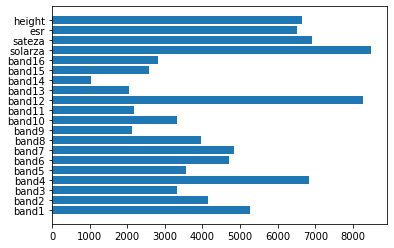

In [47]:
final_lgb_model = lgb.LGBMRegressor(**trial_params)
final_lgb_model.fit(X_train, y_train)
final_lgb_pred = final_lgb_model.predict(X_test)

plt.barh(X_train.columns, final_lgb_model.feature_importances_)

In [48]:
final_lgb_pred

array([-0.00293623, -0.00186103, -0.00034704, ...,  0.00476496,
        0.01032321, -0.00662832])

In [49]:
# pred = model_gs1.predict(X_test)
submission=pd.read_csv('1-1_검증데이터셋.csv', encoding='utf-8')
submission1=submission.copy()
submission1['UV'] = final_lgb_pred
submission1
submission1.to_csv("220224_lgbm_uv_nooutlier_summer1_gs1.csv", index = False)

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,-0.002936
1,202206010000,105,-0.001861
2,202206010000,108,-0.000347
3,202206010000,112,0.005797
4,202206010000,115,0.003697
...,...,...,...
51850,202206250000,146,0.007086
51851,202206250000,152,0.000527
51852,202206250000,156,0.004765
51853,202206250000,159,0.010323


In [42]:
# import joblib

# #save your model or results
# joblib.dump(grid_search, 'lgbm_gs1.pkl')

['lgbm_gs1.pkl']

In [44]:
# model_gs1 = joblib.load("lgbm_gs1.pkl")
# model_gs1

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 7, 9, 11],
                         'n_estimators': [500, 1000, 3000],
                         'num_leaves': [31]})

In [18]:
# max_depth = 5
# n_estimators = 5000             # 400  #1000
# lr = 0.01                     # 0.017
# num_leaves = 31
# early_stopping_rounds = 300      # 100
# verbose = True                  # True

In [15]:
# X_train = train.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'], axis=1)
# X_val = val.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)
# X_test = test.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)

# y_train = train[['uv']].values
# y_val = val[['uv']].values




# lgbm_reg = LGBMRegressor(objective= "regression",
#                      max_depth= max_depth,
#                      n_estimators= n_estimators,
#                      learning_rate= lr,
#                      num_leaves = num_leaves)
    
# lgbm_reg.fit(X_train, y_train,
#           eval_set=[(X_val, y_val)],
#           eval_metric=["mse"],
#           early_stopping_rounds=early_stopping_rounds,
#           verbose=verbose) 




In [100]:
# X_test111.to_csv('202206_uv_final.csv', index=False)

In [101]:
# pd.read_csv('202206_uv_final.csv')

,yyyymmdd,hhnn,stn,lon,lat,band1,band2,band3,band4,band5,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,0.00000,0.00000,-0.00060,0.00060,-0.0003,...,241.07130,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0
1,20220601,0,105,128.89098,37.75147,-0.00057,-0.00057,0.00000,-0.00030,0.0000,...,244.35010,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3
2,20220601,0,108,126.96500,37.57100,0.00000,-0.00057,-0.00030,0.00045,0.0000,...,249.24111,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3
3,20220601,0,112,126.62490,37.47772,0.00000,0.00000,0.00060,0.00045,-0.0003,...,249.94977,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3
4,20220601,0,115,130.89864,37.48129,0.00000,0.00000,0.00089,-0.00030,0.0003,...,239.88321,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,0.00000,-0.00057,-0.00089,0.00015,0.0000,...,258.49191,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3
51851,20220625,0,152,129.33472,35.58250,-0.00057,0.00000,-0.00030,-0.00030,-0.0003,...,263.99872,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2
51852,20220625,0,156,126.89158,35.17294,0.00000,0.00000,0.00089,-0.00030,-0.0003,...,261.53112,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3
51853,20220625,0,159,129.03203,35.10468,0.00000,0.00057,0.00030,-0.00075,-0.0003,...,260.95627,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3


In [47]:
submission1

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,-0.002322
1,202206010000,105,-0.021601
2,202206010000,108,-0.009577
3,202206010000,112,-0.019824
4,202206010000,115,-0.000143
...,...,...,...
51850,202206250000,146,0.011431
51851,202206250000,152,0.006863
51852,202206250000,156,-0.005850
51853,202206250000,159,0.006572


<AxesSubplot:>

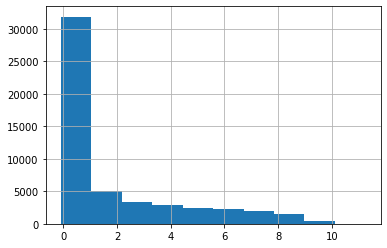

In [50]:
submission1['UV'].hist()      

# 아래는 비율 확인한 것

In [53]:
ddd

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,-0.003720
1,202206010000,105,-0.005291
2,202206010000,108,-0.002185
3,202206010000,112,0.001383
4,202206010000,115,0.000958
...,...,...,...
51850,202206250000,146,0.005621
51851,202206250000,152,-0.002203
51852,202206250000,156,0.006888
51853,202206250000,159,0.005210


In [51]:
li = list(submission1['UV'].values)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

,_ratio
neg,13.917655
0_1,47.148780
1_2,9.019381
2_3,6.147912
3_4,5.067978
4_5,4.423874
5_6,4.030470
6_7,3.571497
7_8,3.473146
8_9,2.402854


In [61]:
li = list(ddd['UV'].values)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

,_ratio
neg,16.900974
0_1,44.502941
1_2,8.903674
2_3,6.159483
3_4,5.133545
4_5,4.333237
5_6,3.951403
6_7,3.633208
7_8,3.332369
8_9,2.306431


In [65]:
li = list(ddd1['UV'].values)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

,_ratio
neg,23.984187
0_1,37.305949
1_2,8.953814
2_3,6.055347
3_4,5.191399
4_5,4.279240
5_6,4.049754
6_7,3.662135
7_8,3.386366
8_9,2.304503
